## Build a basic chatbot with 'LangGraph' using 'Graph API'

Components of LangGraph
- Edge = arow in graph
- Nodes = box in graph
- State = variable that can be access by any Node

"State Graph"

input ---> NODE("ChatBot") ---> output

NODE("ChatBot) => LLM + Prompt

In [1]:
from typing import Annotated

from typing_extensions import TypedDict             # dict type

from langgraph.graph import (
    StateGraph,                                     # whole graph
    START,                                          # start node
    END                                             # end node
)

from langgraph.graph.message import add_messages    # reducers

state_varaiable = {
    messages = [list of all the messages any new message will be appended here]
}

to append the message in messages list we can use "Reducers". 'add_messages' is one of the reducers.

mesages have type list.
the add_messages annotation defines how the 'State' should be updated.
in this case (when we are using add_messages), it appends the message to the list rather than overwriting them

In [2]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
graph_builder = StateGraph(State)

In [3]:
graph_builder

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

True

### LLM

In [5]:
# defining LLM

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model = "llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x75a9fcd571a0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x75a9fd317bf0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
llm = init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x75a9fcd858e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x75a9fcd86ae0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

### Node

In [7]:
def chatbot(state: State):
    return {
        "messages": [llm.invoke(state['messages'])]
    }

### Building Graph

we have
- 1 input
- 1 output
- 1 Node
- 2 Edge
- 1 State

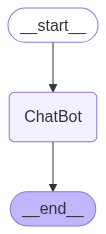

In [8]:
graph_builder = StateGraph(State)

# adding node
graph_builder.add_node("ChatBot", chatbot)

# adding Edge
graph_builder.add_edge(START, "ChatBot")
graph_builder.add_edge("ChatBot", END)

# Compile the Graph
graph = graph_builder.compile()
graph

### Visualize the Graph

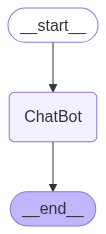

In [9]:
from IPython.display import Image, display

try:
    display(
        Image(
            graph.get_graph().draw_mermaid_png()
        )
    )
except Exception:
    pass

## Running this Graph

In [10]:
response = graph.invoke({"messages": "Hi, how are you? Tell me your model name."})

In [11]:
response

{'messages': [HumanMessage(content='Hi, how are you? Tell me your model name.', additional_kwargs={}, response_metadata={}, id='0543ec48-a652-42be-abd6-432359a46f92'),
  AIMessage(content="I'm doing well, thanks for asking! I'm LLaMA, a large language model trained by Meta AI that can understand and respond to human input in a conversational manner. I'm here to chat with you, answer your questions, and provide information on a wide range of topics. What's on your mind?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 22, 'total_tokens': 88, 'completion_time': 0.101669788, 'prompt_time': 0.008828433, 'queue_time': 1.5055410100000002, 'total_time': 0.110498221}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6d1c2b0784', 'finish_reason': 'stop', 'logprobs': None}, id='run--1a511fb4-3eb3-4907-9ad0-97c9ff4acc83-0', usage_metadata={'input_tokens': 22, 'output_tokens': 66, 'total_tokens': 88})]}

In [12]:
response["messages"]

[HumanMessage(content='Hi, how are you? Tell me your model name.', additional_kwargs={}, response_metadata={}, id='0543ec48-a652-42be-abd6-432359a46f92'),
 AIMessage(content="I'm doing well, thanks for asking! I'm LLaMA, a large language model trained by Meta AI that can understand and respond to human input in a conversational manner. I'm here to chat with you, answer your questions, and provide information on a wide range of topics. What's on your mind?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 22, 'total_tokens': 88, 'completion_time': 0.101669788, 'prompt_time': 0.008828433, 'queue_time': 1.5055410100000002, 'total_time': 0.110498221}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6d1c2b0784', 'finish_reason': 'stop', 'logprobs': None}, id='run--1a511fb4-3eb3-4907-9ad0-97c9ff4acc83-0', usage_metadata={'input_tokens': 22, 'output_tokens': 66, 'total_tokens': 88})]

In [13]:
graph.invoke({"messages": "what is todays date?"})

{'messages': [HumanMessage(content='what is todays date?', additional_kwargs={}, response_metadata={}, id='88d3626f-e786-43d9-98b1-7b395f2b15d9'),
  AIMessage(content="I'm just an AI, I don't have real-time access to the current date. I can only provide a response based on my training data, which is a snapshot of the date and time when my training data was last updated.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 16, 'total_tokens': 64, 'completion_time': 0.069801333, 'prompt_time': 0.0060482, 'queue_time': 0.287482384, 'total_time': 0.075849533}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--7cd4a24c-72cb-4e52-8fb4-e462c49e70c8-0', usage_metadata={'input_tokens': 16, 'output_tokens': 48, 'total_tokens': 64})]}

In [14]:
response["messages"][-1].content

"I'm doing well, thanks for asking! I'm LLaMA, a large language model trained by Meta AI that can understand and respond to human input in a conversational manner. I'm here to chat with you, answer your questions, and provide information on a wide range of topics. What's on your mind?"

Streaming the specific data.

running the entire graph and displaying the information

In [15]:
for event in graph.stream({'messages': 'Hi, how are you, what is your model name?'}):
    print(event)

{'ChatBot': {'messages': [AIMessage(content='I\'m doing well, thanks for asking! I\'m an AI, so I don\'t have a personal name, but I\'m often referred to as a "language model" or a "conversational AI." I\'m a large language model trained by a team of researcher at Meta AI, and my primary function is to understand and respond to human language in a helpful and accurate way. I\'m constantly learning and improving, so please bear with me if I don\'t always get it right!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 22, 'total_tokens': 122, 'completion_time': 0.13887265, 'prompt_time': 0.004140071, 'queue_time': 0.31108058699999996, 'total_time': 0.143012721}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'stop', 'logprobs': None}, id='run--d7f060e4-5bcd-4974-ac27-42079afc885a-0', usage_metadata={'input_tokens': 22, 'output_tokens': 100, 'total_tokens': 122})]}}


In [16]:
for event in graph.stream({'messages': 'Hi, how are you, what is your model name?'}):
    for value in event.values():
        print(value)
        print(value['messages'][-1].content)

{'messages': [AIMessage(content="I'm doing well, thank you for asking! I'm LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm a large language model trained on a massive dataset of text from the internet, which allows me to generate human-like responses to a wide range of topics and questions. I'm constantly learning and improving my abilities, so please bear with me if I make any mistakes or don't quite understand what you're asking. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 108, 'prompt_tokens': 22, 'total_tokens': 130, 'completion_time': 0.153727875, 'prompt_time': 0.004244388, 'queue_time': 0.2814798, 'total_time': 0.157972263}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--629cab88-e2b1-4ecf-87c2-7e354420048e-0', usage_metadata={'input_tokens': 22, 'output_tokens': 108

In [17]:
graph.invoke({"messages": "Provide me the recent AI news with date"})

{'messages': [HumanMessage(content='Provide me the recent AI news with date', additional_kwargs={}, response_metadata={}, id='c555b149-252c-434a-a248-0d3c126df30b'),
  AIMessage(content='Here are some recent AI news articles with dates:\n\n**March 2023**\n\n1. **Google\'s AI Model Can Generate Realistic Fake Videos**: A new AI model developed by Google can generate realistic fake videos of people performing various actions, raising concerns about deepfakes and their potential misuse. (Source: The Verge, March 14, 2023)\n2. **Microsoft Acquires AI-Powered Medical Imaging Company**: Microsoft has acquired AI-powered medical imaging company, Nuance Communications, for $19.7 billion, expanding its presence in the healthcare industry. (Source: CNBC, March 12, 2023)\n\n**February 2023**\n\n1. **AI-Powered Chatbots Can Detect Mental Health Issues**: Researchers have developed AI-powered chatbots that can detect mental health issues such as depression and anxiety, and provide personalized supp

# ChatBot with Tool

In [18]:
diagram = '''
                                 ---> NODE(tools) --->
                                /                     \
input ---> NODE(ToolCallingLLM) --------------------> output

Tools => Tavily Search (web search) + Custom Tool

'''

In [19]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results = 2)
tool.invoke("What is langGraph?")

{'query': 'What is langGraph?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by modeling 

In [20]:
# creating custom function

def multiply(a: int, b: int) -> int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    # this is called doc string
    return a*b

In [21]:
# creating tools
tools = [tool, multiply]
tools

[TavilySearch(max_results=2, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'))),
 <function __main__.multiply(a: int, b: int) -> int>]

In [22]:
# binding tools with llm
llm_with_tools = llm.bind_tools(tools = tools)
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x75a9fcd858e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x75a9fcd86ae0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list of domai

Binding ==> LLM + Tools    
[helps LLM to know which ara all the tools it has]

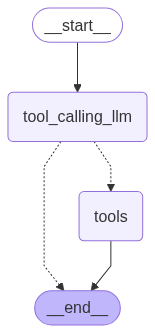

In [23]:
# State Graph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Node definition
def tool_calling_llm(state: State):
    return {
        'messages': [llm_with_tools.invoke(state['messages'])]
    }

# building graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools = tools))

# adding edges
builder.add_edge(START, "tool_calling_llm")
# from tool_calling_llm there are 2 edges one give output and other call tools - this type of edges are called conditional edges
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
    # What is this tools_condition
    # if the latest message (result) from the assistant is a tool call -- tools_condition routes to tools (tools=[], you have to use teh same name)
    # if the latest message (result) from the assistant is not a tool call -- tools_condition routes to END
)
builder.add_edge("tools", END)

# compile graph
graph = builder.compile()
graph

In [24]:
response = graph.invoke({'messages': 'WHat is the latest AI news?'})
response

{'messages': [HumanMessage(content='WHat is the latest AI news?', additional_kwargs={}, response_metadata={}, id='251ec306-ec9d-429a-887d-06c3dba684c2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'zh5vbb6cx', 'function': {'arguments': '{"query":"latest AI news","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 2196, 'total_tokens': 2289, 'completion_time': 0.134784745, 'prompt_time': 0.247466203, 'queue_time': 0.31249087500000006, 'total_time': 0.382250948}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--860271cf-5a21-47b7-82cb-4e55466b1c0e-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'latest AI news', 'search_depth': 'advanced', 'time_range': 'day', 'topic': 'news'}, 'id': 'zh5vbb6cx', 'type': 'tool_call'}], usage_metadata={'inpu

In [25]:
response['messages'][-1].content

'{"query": "latest AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.startupecosystem.ca/news/ai-and-mvp-optimization-at-techcrunch-all-stage-with-chris-gardner/", "title": "AI and MVP Optimization at TechCrunch All Stage with Chris Gardner - Startup Ecosystem Canada", "score": 0.57723385, "published_date": "Sat, 28 Jun 2025 09:05:41 GMT", "content": "acquisitionAI developmentAI infrastructureAI innovationAI integrationAI investmentAI modelsAI technologyAmazonAnthropicAppleArtificial IntelligenceAutonomous vehiclesCanada founder newsCanada startup newscryptocurrencyCybersecurityDeepSeekElectric VehiclesElon MuskentrepreneurshipfintechFunding roundGenerative AIGlobal founder newsGlobal startup newshealthcare innovationInnovationinvestmentIPOMetaMicrosoftNvidiaOntario founder newsOntario startup newsOpenAIQuantum computingSam AltmanSeed [...] ### DeepSeek Faces Global Restrictions Due to Data Security Concerns\\n\\nImage 12: Startup Eco

In [26]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

WHat is the latest AI news?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (zh5vbb6cx)
 Call ID: zh5vbb6cx
  Args:
    query: latest AI news
    search_depth: advanced
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.startupecosystem.ca/news/ai-and-mvp-optimization-at-techcrunch-all-stage-with-chris-gardner/", "title": "AI and MVP Optimization at TechCrunch All Stage with Chris Gardner - Startup Ecosystem Canada", "score": 0.57723385, "published_date": "Sat, 28 Jun 2025 09:05:41 GMT", "content": "acquisitionAI developmentAI infrastructureAI innovationAI integrationAI investmentAI modelsAI technologyAmazonAnthropicAppleArtificial Intelligen

In [27]:
response = graph.invoke({'messages': 'WHat is 9 multiply by 5?'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

WHat is 9 multiply by 5?
================================== Ai Message ==================================
Tool Calls:
  multiply (8qhy17dnh)
 Call ID: 8qhy17dnh
  Args:
    a: 9
    b: 5
================================= Tool Message =================================
Name: multiply

45


In [28]:
response = graph.invoke({'messages': 'WHat is 9 multiply by 5 then nultiply 2?'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

WHat is 9 multiply by 5 then nultiply 2?
================================== Ai Message ==================================
Tool Calls:
  multiply (tgjqrpse0)
 Call ID: tgjqrpse0
  Args:
    a: 9
    b: 5
  multiply (bybq8mha6)
 Call ID: bybq8mha6
  Args:
    a: 45
    b: 2
================================= Tool Message =================================
Name: multiply

45
================================= Tool Message =================================
Name: multiply

90


In [29]:
response = graph.invoke({'messages': 'Give me recent ai new by apple and what is multiply 9 and 7'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me recent ai new by apple and what is multiply 9 and 7
================================== Ai Message ==================================
Tool Calls:
  tavily_search (fkyz7jvws)
 Call ID: fkyz7jvws
  Args:
    query: recent ai news by apple
    search_depth: advanced
    topic: news
  multiply (h53f6ygvm)
 Call ID: h53f6ygvm
  Args:
    a: 9
    b: 7
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news by apple", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.forbes.com/sites/ewanspence/2025/06/22/apple-news-headlines-iphone-17-pro-ios-26-ipados-multitasking-macbook-pro-upgrade/", "title": "Apple Loop: iPhone 17 Pro Release Date, Apple Challenges AI Assumptions, iPad Pro Multitasking Explained - Forbes", "score": 0.8055255, "published_date": "Sun, 22 Jun 2025 20:05:00 GMT", "content":

# ReAct Agent architecture

In [30]:
diagram = '''
input ---> NODE(ToolCallingLLM) <---> NODE(tools)
                    |
                    -----> output

Tools => Tavily Search (web search) + Custom Tool

'''

3 elements in ReAct Agent

- Act = whenever input comes LLM will be able to make the tool call

- Observe = when teh output of Tools comes teh LLM will observe

- Reason = after getting the output and no input left then what the LLM should do, that LLM is making the decision (Agent behavioud comes into picture)

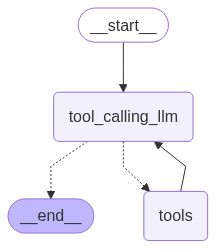

In [31]:
# State Graph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Node definition
def tool_calling_llm(state: State):
    return {
        'messages': [llm_with_tools.invoke(state['messages'])]
    }

# building graph
builder = StateGraph(State)

# adding nodes
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools = tools))

# adding edges
builder.add_edge(START, "tool_calling_llm")
# from tool_calling_llm there are 2 edges one give output and other call tools - this type of edges are called conditional edges
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
    # What is this tools_condition
    # if the latest message (result) from the assistant is a tool call -- tools_condition routes to tools (tools=[], you have to use teh same name)
    # if the latest message (result) from the assistant is not a tool call -- tools_condition routes to END
)
builder.add_edge("tools", "tool_calling_llm")

# compile graph
graph = builder.compile()
graph

In [32]:
response = graph.invoke({'messages': 'Give me recent ai new by apple and what is multiply 9 and 7'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me recent ai new by apple and what is multiply 9 and 7
================================== Ai Message ==================================
Tool Calls:
  tavily_search (52c0bybtz)
 Call ID: 52c0bybtz
  Args:
    query: recent ai news by apple
    search_depth: advanced
    topic: news
  multiply (rtmm5a6se)
 Call ID: rtmm5a6se
  Args:
    a: 9
    b: 7
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news by apple", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.forbes.com/sites/ewanspence/2025/06/22/apple-news-headlines-iphone-17-pro-ios-26-ipados-multitasking-macbook-pro-upgrade/", "title": "Apple Loop: iPhone 17 Pro Release Date, Apple Challenges AI Assumptions, iPad Pro Multitasking Explained - Forbes", "score": 0.8055255, "published_date": "Sun, 22 Jun 2025 20:05:00 GMT", "content":

# Adding memory in Agentic Graph

Memory will be required for "Chat History"

In [33]:
response = graph.invoke({'messages': 'My name is Yash'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

My name is Yash
================================== Ai Message ==================================

Nice to meet you, Yash!


In [34]:
response = graph.invoke({'messages': 'What is my name'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is my name
================================== Ai Message ==================================

I'm not aware of any information that would allow me to determine your name. I'm a large language model, I don't have the ability to access personal information or identify individuals. I'm here to provide information and answer questions to the best of my ability, but I don't have the capability to recall or store personal information. If you'd like to provide me with more context or information, I'd be happy to try and help you further.


Here we dont have any memory. Model does knwo about teh previous conversation

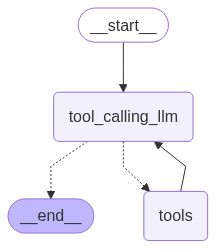

In [35]:
# Memory
# in-memory checkpoint saver
# this memory checkpoint saver will store chekpoints in memory using a defaultDict
# w.r.t every NODE that it excutes it will save all the information so that we can recall this memory again and again
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()


# Node definition
def tool_calling_llm(state: State):
    return {
        'messages': [llm_with_tools.invoke(state['messages'])]
    }

# building graph
builder = StateGraph(State)

# adding nodes
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools = tools))

# adding edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools", "tool_calling_llm")

# compile graph = adding memory here
graph = builder.compile(checkpointer = memory)
graph

creating a thread

In [36]:
config = {'configurable': {'thread_id': '1'}}

response = graph.invoke({'messages': 'hi, my name is yash'}, config = config)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

hi, my name is yash
================================== Ai Message ==================================

Nice to meet you, Yash!


In [37]:
response = graph.invoke({'messages': 'what is my name'}, config = config)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

hi, my name is yash
================================== Ai Message ==================================

Nice to meet you, Yash!
================================ Human Message =================================

what is my name
================================== Ai Message ==================================

Your name is Yash.


In [38]:
response = graph.invoke({'messages': 'What is the meaning of my Name?'}, config = config)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

hi, my name is yash
================================== Ai Message ==================================

Nice to meet you, Yash!
================================ Human Message =================================

what is my name
================================== Ai Message ==================================

Your name is Yash.
================================ Human Message =================================

What is the meaning of my Name?
================================== Ai Message ==================================

Yash is a Hindu name, and it means "victory" or "winning" in Sanskrit. In some cultures, it is also associated with the god of victory, Yama.


# Streaming

Methods = .stream() and .astream() for streaming back results

Parameters
- values = streams the full state of the graph after each node is called
- updates = stream updates to the state of the graph after each node is called

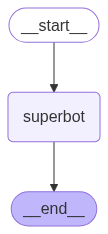

In [39]:
# memory
memory = MemorySaver()

# node
def superbot(state: State):
    return {'messages': [llm.invoke(state['messages'])]}

# building graph
builder = StateGraph(State)

# adding node
builder.add_node("superbot", superbot)

# adding edge
builder.add_edge(START, "superbot")
builder.add_edge("superbot", END)

# compile
graph = builder.compile(checkpointer = memory)

# display
graph

In [40]:
# creating thread
config = {'configurable': {'thread_id': '1'}}

graph.invoke({'messages': 'i am yash and i like tech'}, config=config)

{'messages': [HumanMessage(content='i am yash and i like tech', additional_kwargs={}, response_metadata={}, id='51de91b6-0e0a-4c17-ba0b-6b13a44f8002'),
  AIMessage(content="Nice to meet you, Yash! It's great to hear that you're interested in tech! What aspect of tech are you most passionate about? Are you into coding, AI, cybersecurity, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 18, 'total_tokens': 62, 'completion_time': 0.064452402, 'prompt_time': 0.005750734, 'queue_time': 0.311147355, 'total_time': 0.070203136}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--f8f984df-68ea-4419-836b-53f12048886a-0', usage_metadata={'input_tokens': 18, 'output_tokens': 44, 'total_tokens': 62})]}

In [41]:
# creating thread
config = {'configurable': {'thread_id': '2'}}

for chunk in graph.stream({'messages': 'hi, i am yash and i like tech'}, config=config, stream_mode = "updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content="Hi Yash! It's great to meet you! It's awesome that you like tech! What kind of tech are you into? Are you more into coding, gadgets, artificial intelligence, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 20, 'total_tokens': 63, 'completion_time': 0.061955843, 'prompt_time': 0.003894471, 'queue_time': 0.280711018, 'total_time': 0.065850314}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--0ba6787f-4cf4-4652-83b8-27c11476e06c-0', usage_metadata={'input_tokens': 20, 'output_tokens': 43, 'total_tokens': 63})]}}


Above: only last message will be display for the above one, that is AI message (no human message) in above. only output will be display

Below: all the messages will be displayed, human and AI. ALl the conversation is getting updated. Everythin will be display

In [42]:
for chunk in graph.stream({'messages': 'hi, i am yash and i like tech'}, config=config, stream_mode = "values"):
    print(chunk)

{'messages': [HumanMessage(content='hi, i am yash and i like tech', additional_kwargs={}, response_metadata={}, id='87f44413-4085-48fd-8bce-38251b82c49e'), AIMessage(content="Hi Yash! It's great to meet you! It's awesome that you like tech! What kind of tech are you into? Are you more into coding, gadgets, artificial intelligence, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 20, 'total_tokens': 63, 'completion_time': 0.061955843, 'prompt_time': 0.003894471, 'queue_time': 0.280711018, 'total_time': 0.065850314}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--0ba6787f-4cf4-4652-83b8-27c11476e06c-0', usage_metadata={'input_tokens': 20, 'output_tokens': 43, 'total_tokens': 63}), HumanMessage(content='hi, i am yash and i like tech', additional_kwargs={}, response_metadata={}, id='bd084e97-4c2c-491c-bd4f-146a82632b2b')]}
{'messages': [HumanMe

In [43]:
# creating thread
config = {'configurable': {'thread_id': '3'}}

for chunk in graph.stream({'messages': 'hi, i am yash and i like tech'}, config=config, stream_mode = "updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content="Hi Yash! Nice to meet you! It's great to hear that you're interested in tech! What specifically do you like about tech? Are you into programming, gadgets, artificial intelligence, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 20, 'total_tokens': 64, 'completion_time': 0.062388617, 'prompt_time': 0.004432342, 'queue_time': 0.31260981600000004, 'total_time': 0.066820959}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--c0b5d308-dbb1-4389-8ff9-3f8f17247b06-0', usage_metadata={'input_tokens': 20, 'output_tokens': 44, 'total_tokens': 64})]}}


In [44]:
for chunk in graph.stream({'messages': 'I also like batminton'}, config=config, stream_mode = "values"):
    print(chunk)

{'messages': [HumanMessage(content='hi, i am yash and i like tech', additional_kwargs={}, response_metadata={}, id='2b652085-217b-41e0-a718-95e6a35e7067'), AIMessage(content="Hi Yash! Nice to meet you! It's great to hear that you're interested in tech! What specifically do you like about tech? Are you into programming, gadgets, artificial intelligence, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 20, 'total_tokens': 64, 'completion_time': 0.062388617, 'prompt_time': 0.004432342, 'queue_time': 0.31260981600000004, 'total_time': 0.066820959}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--c0b5d308-dbb1-4389-8ff9-3f8f17247b06-0', usage_metadata={'input_tokens': 20, 'output_tokens': 44, 'total_tokens': 64}), HumanMessage(content='I also like batminton', additional_kwargs={}, response_metadata={}, id='e92ebf63-fb54-440c-b31b-d49de4c77994')]}

In [45]:
# creating thread
config = {'configurable': {'thread_id': '4'}}

async for chunk in graph.astream({'messages': 'hi, i am yash and i like tech'}, config=config, stream_mode = "updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content="Hi Yash! Nice to meet you! It's great to hear that you're interested in tech. What kind of tech are you into? Are you more into coding, gadgets, AI, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 20, 'total_tokens': 64, 'completion_time': 0.062610357, 'prompt_time': 0.00527754, 'queue_time': 0.31075587899999996, 'total_time': 0.067887897}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'stop', 'logprobs': None}, id='run--0819d6bc-9457-45e9-a59e-193746b3dae6-0', usage_metadata={'input_tokens': 20, 'output_tokens': 44, 'total_tokens': 64})]}}


In [46]:
# creating thread
config = {'configurable': {'thread_id': '4'}}

async for chunk in graph.astream({'messages': 'hi, i am yash and i like tech'}, config=config, stream_mode = "values"):
    print(chunk)

{'messages': [HumanMessage(content='hi, i am yash and i like tech', additional_kwargs={}, response_metadata={}, id='ff27b1d0-22a8-4e44-be68-005630332a9c'), AIMessage(content="Hi Yash! Nice to meet you! It's great to hear that you're interested in tech. What kind of tech are you into? Are you more into coding, gadgets, AI, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 20, 'total_tokens': 64, 'completion_time': 0.062610357, 'prompt_time': 0.00527754, 'queue_time': 0.31075587899999996, 'total_time': 0.067887897}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'stop', 'logprobs': None}, id='run--0819d6bc-9457-45e9-a59e-193746b3dae6-0', usage_metadata={'input_tokens': 20, 'output_tokens': 44, 'total_tokens': 64}), HumanMessage(content='hi, i am yash and i like tech', additional_kwargs={}, response_metadata={}, id='3bb7f40d-0565-41c6-af47-9b5df78084b1')]}
{'messages': [HumanMess

In [47]:
# creating thread
config = {'configurable': {'thread_id': '5'}}

async for event in graph.astream_events({'messages': 'hi, i am yash and i like tech'}, config=config, version='v2'):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'hi, i am yash and i like tech'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '7cad732f-72bd-46a5-9abc-123d0cdc5e61', 'metadata': {'thread_id': '5'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='hi, i am yash and i like tech', additional_kwargs={}, response_metadata={}, id='64f4a662-66bb-49af-b015-b29ad27bd369')]}}, 'name': 'superbot', 'tags': ['graph:step:1'], 'run_id': 'f23da8fa-ef04-4911-b854-bf738839c0df', 'metadata': {'thread_id': '5', 'langgraph_step': 1, 'langgraph_node': 'superbot', 'langgraph_triggers': ('branch:to:superbot',), 'langgraph_path': ('__pregel_pull', 'superbot'), 'langgraph_checkpoint_ns': 'superbot:00510f25-0924-b2dc-4255-c6b0495c9e01'}, 'parent_ids': ['7cad732f-72bd-46a5-9abc-123d0cdc5e61']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='hi, i am yash and i like tech', additional_kwargs={}, response_metadata={

# Human in the Loop

In [140]:
from langgraph.types import interrupt, Command
from langchain_core.tools import tool

In [141]:
# human assistant

@tool
def human_assistant(query: str) -> str:
    """Request assistant from the human"""
    human_response = interrupt({'query': query})
    return human_response['data']

In [142]:
travily_search = TavilySearch(max_results = 2)

In [143]:
# defining tools
tools = [travily_search, human_assistant]

In [144]:
# binding llm with tools
llm_with_tools = llm.bind_tools(tools)

In [145]:
# Node
def chatbot(state: State):
    return {
        'messages': [llm_with_tools.invoke(state['messages'])]
    }

In [146]:
# Memory
memory = MemorySaver()

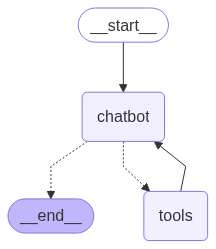

In [147]:
# Building graph
builder = StateGraph(State)

# adding nodes
builder.add_node('chatbot', chatbot)
tool_node = ToolNode(tools = tools)
builder.add_node('tools', tool_node)

# adding edges
builder.add_edge(START, 'chatbot')
builder.add_conditional_edges('chatbot', tools_condition)
builder.add_edge('tools', 'chatbot')

# compile
graph = builder.compile(checkpointer = memory)
graph

In [148]:
# config
config = {'configurable': {'thread_id': '1'}}

# running the graph
events = graph.stream(
    {'messages': 'I need some expert guidance and assistance for building an AI agent. Can you please request assistant for me?'},
    config = config,
    stream_mode = 'values',
)
for event in events:
    if 'messages' in event:
        event['messages'][-1].pretty_print()

================================ Human Message =================================

I need some expert guidance and assistance for building an AI agent. Can you please request assistant for me?
================================== Ai Message ==================================
Tool Calls:
  human_assistant (g45tz8637)
 Call ID: g45tz8637
  Args:
    query: I need some expert guidance and assistance for building an AI agent. Can you please request assistant for me?


In [149]:
# human intervension
human_response = {
    "We can use langGraph and n8n to build the ai agents. You can seach on web reagrding these tools"
}
human_command = Command(resume = {'data': human_response})

# run after human intervention
events = graph.stream(human_command, config = config, stream_mode = 'values')
for event in events:
    if 'messages' in event:
        event['messages'][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  human_assistant (g45tz8637)
 Call ID: g45tz8637
  Args:
    query: I need some expert guidance and assistance for building an AI agent. Can you please request assistant for me?
================================= Tool Message =================================
Name: human_assistant

{'We can use langGraph and n8n to build the ai agents. You can seach on web reagrding these tools'}
================================== Ai Message ==================================
Tool Calls:
  tavily_search (0cm0ftx91)
 Call ID: 0cm0ftx91
  Args:
    exclude_domains: None
    include_domains: None
    include_images: False
    query: How to use langGraph and n8n to build AI agents
    search_depth: advanced
    time_range: None
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "How to use langGraph and n8n to build AI agents", "follow_